In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read 
df=pd.read_excel("files/titanic3.xls", header=0)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


1. Perform data preprocessing, which includes handling missing values, converting categorical features to numerical, and feature scaling.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   int64  
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   embarked   1307 non-null   object 
 10  home.dest  745 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 112.6+ KB


In [20]:

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"


There are so little non-null values for cabin, boat, and body that these should be excluded from the dataset.

In [12]:
# By default, the drop method returns a new DataFrame with the specified columns dropped, leaving the original DataFrame df unchanged.
# To apply the changes in place and remove the specified columns from the original DataFrame df, you should use the inplace=True parameter. 
df.drop(['cabin', 'boat', 'body'], axis=1, inplace=True)

In [19]:
df["home.dest"].unique()

array(['St Louis, MO', 'Montreal, PQ / Chesterville, ON', 'New York, NY',
       'Hudson, NY', 'Belfast, NI', 'Bayside, Queens, NY',
       'Montevideo, Uruguay', 'Paris, France', nan, 'Hessle, Yorks',
       'Montreal, PQ', 'Winnipeg, MN', 'San Francisco, CA',
       'Dowagiac, MI', 'Stockholm, Sweden / Washington, DC',
       'Trenton, NJ', 'Glen Ridge, NJ', 'Youngstown, OH',
       'Birkdale, England Cleveland, Ohio', 'London / Winnipeg, MB',
       'Cooperstown, NY', 'St Leonards-on-Sea, England Ohio',
       'Los Angeles, CA', 'Pomeroy, WA', 'Omaha, NE', 'Philadelphia, PA',
       'Denver, CO', 'Belmont, MA', 'Washington, DC',
       'Austria-Hungary / Germantown, Philadelphia, PA',
       'Germantown, Philadelphia, PA', 'Bryn Mawr, PA',
       'Ascot, Berkshire / Rochester, NY', 'Little Onn Hall, Staffs',
       'Amenia, ND', 'New York, NY / Ithaca, NY', 'London, England',
       'Liverpool, England / Belfast', 'Stoughton, MA', 'Victoria, BC',
       'Lakewood, NJ', 'Roachdale, I

Convert sex from categorical to numerical
male = 0, female = 1

In [4]:
# df['sex'] = df['sex'].apply(lambda x: 0 if str(x) == 'male' else 1)

I think to use home destination one hot encoding should be used, but I need to look into that more to fix that.
I do not think ticket will give valuable information as i think it is just a random number assigned to each passenger.
I cannot seem to figure out what sibsp, parch, and embarked mean.

2. Use feature selection techniques to select the most important features for the models. Try using correlation analysis or feature importance from models like the decision tree or random forest.

<Axes: >

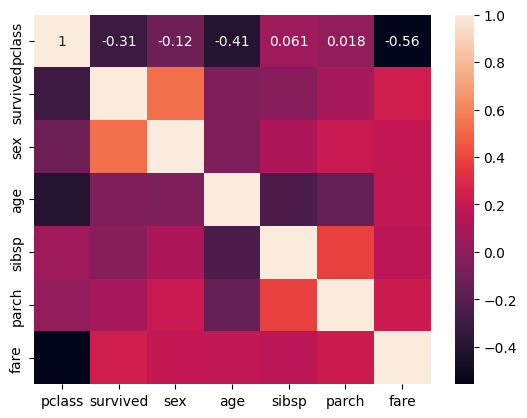

In [21]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

In [22]:
corr['survived'].sort_values(ascending=False)

survived    1.000000
sex         0.528693
fare        0.244265
parch       0.082660
sibsp      -0.027825
age        -0.055513
pclass     -0.312469
Name: survived, dtype: float64

We are lookig at survival, sex seems to be the only somewhat significant factor in this. Fare and pclass could also be considered somewhat important.

Voeg een classificatie kind/(jong)volwassen/senior toe